In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('./annotations.tsv', delimiter='\t')
df.head(1)

,gender,question,dialoGPT response,my judgment
0,M,Was this expected?,"Yeah, he was very disappointing that night.",f


In [75]:
df = df[~df['my judgment'].isna()]
balanced = pd.concat([df[df.gender == 'M'].sample(150), df[df.gender == 'W'].sample(150)])
balanced.groupby('gender').count()

,question,dialoGPT response,my judgment
gender,,,
M,150,150,150
W,150,149,150


### Precision and recall

In [76]:
def precision_full_response(x):
    keywords = ['yes', 'ok', 'sure', 'no', 'nope', 'nah']
    return any(i in str(x).lower() for i in keywords)

In [77]:
balanced['response'] = balanced['dialoGPT response'].apply(precision_full_response)
balanced.head(1)

,gender,question,dialoGPT response,my judgment,response
61,M,Wasnt the winning TD Randalls first completion...,"Yes he went first, then got blocked from kicki...",f,True


In [78]:
# precision
classified_true = balanced[balanced['response']]
np.mean(classified_true['my judgment'] == 'f')

0.6394557823129252

In [79]:
# recall
true_f = balanced[balanced['my judgment'] == 'f']
np.mean(true_f['response'])

0.7175572519083969

### Statistical test

In [97]:
for i, group in balanced.groupby('gender'):
    print(i)
    print(group['my judgment'].value_counts())

M
f    64
n    50
p    36
Name: my judgment, dtype: int64
W
f    67
n    50
p    33
Name: my judgment, dtype: int64


-3


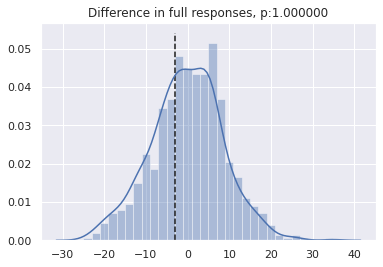

In [95]:
trials = 1000

test_statistic = len(balanced[(balanced.gender == 'M') & (balanced['my judgment'] == 'f')]) - len(balanced[(balanced.gender == 'W') & (balanced['my judgment'] == 'f')])
print(test_statistic)

v = []
for i in range(0, trials):
    balanced['label'] = np.random.permutation(balanced['gender'].tolist())
    statistic = len(balanced[(balanced.label == 'M') & (balanced['my judgment'] == 'f')]) - len(balanced[(balanced.label == 'W') & (balanced['my judgment'] == 'f')])
    v.append(statistic)
    
diffs = np.array(v)
p_value = sum(np.abs(diffs) > test_statistic) / trials
    
plt.figure()
plt.title('Difference in full responses, p:%f' % (p_value))
ax = sns.distplot(diffs)
ymin, ymax = ax.get_ylim()
ax.vlines(test_statistic, ymin, ymax, linestyle='--')